# Creating and Backtesting SMA Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

#pip install zigzag
from zigzag import *
import yfinance as yf


/tmp/ipykernel_16500/215239187.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


[*********************100%***********************]  1 of 1 completed
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
1.0


,Open,High,Low,Close,Adj Close,returns,Min/Max Points,position
Datetime,,,,,,,,
2024-01-01 18:45:00,1.105583,1.105583,1.105583,1.105583,1.105583,0.000000,1.0,0
2024-01-01 19:00:00,1.105583,1.105583,1.105583,1.105583,1.105583,0.000000,0.0,0
2024-01-01 19:30:00,1.105339,1.105339,1.105339,1.105339,1.105339,-0.000221,0.0,0
2024-01-01 19:45:00,1.105339,1.105339,1.105339,1.105339,1.105339,0.000000,0.0,0
2024-01-01 20:00:00,1.105339,1.105339,1.105339,1.105339,1.105339,0.000000,0.0,0


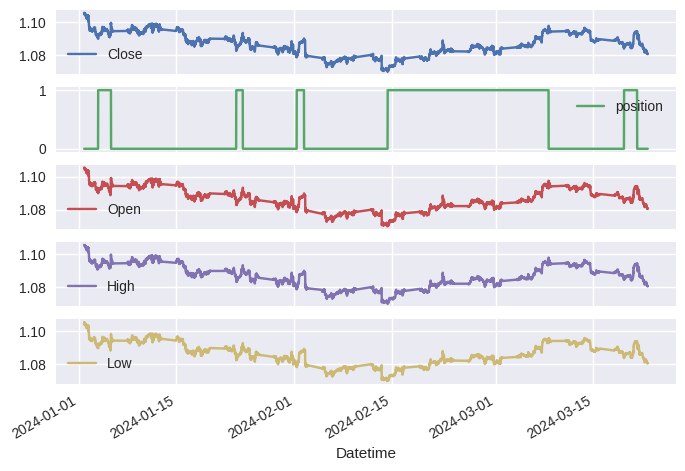

In [5]:
#data = pd.read_csv("DNN_data.csv", parse_dates = ["time"], index_col = "time")
# Data download
symbol = "EURUSD=X"
period ='60d'
interval ='15m'


# load data
def get_yfinance_hist(symbol = "EURUSD=X", period ='1mo', interval ='15m', show_plot = True ):
    df_raw = yf.download(symbol,period= period ,interval=interval)
    df_raw["returns"] = np.log(df_raw.Close.div(df_raw.Close.shift(1)))
    df_raw.dropna(how="any",inplace=True)
    df_raw = df_raw.drop('Volume', axis=1)

    #Convert data into numpy array
    closing_prices = np.asarray(df_raw['Close'])

    #Calculate min/max points
    #Calculate min/max points
    #Calculate min/max points
    min_max_points = peak_valley_pivots(closing_prices, 0.008,-0.008)

    #Add as a column to the original df2
    df_raw['Min/Max Points'] = min_max_points

    #Replace all 0s with NaN values
    df_raw['Min/Max Points'] = df_raw['Min/Max Points'].replace(0,np.NaN)#Interpolate

    df_raw['position'] = 0
    lastValue = 0
    df_raw['Min/Max Points'].fillna(0, inplace=True)
    for i, row in df_raw.iterrows():
        if row['Min/Max Points'] != 0:
            print(row['Min/Max Points'])
            
            if(row['Min/Max Points'] == -1):
              lastValue = 1
        
            if(row['Min/Max Points'] == 1):
              lastValue = 0
        
        df_raw.at[i,'position'] = lastValue


    if(show_plot):
      plot_cols = ['Close', 'position', 'Open', 'High', 'Low']
      plot_features = df_raw[plot_cols]
      plot_features.index = df_raw.index
      _ = plot_features.plot(subplots=True)

    df_raw = df_raw.dropna()

    return df_raw

df = get_yfinance_hist(symbol = symbol, period = period, interval= interval )
df.head()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2024-01-01 19:00:00 to 2024-03-22 19:00:00
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            2 non-null      float64
 1   High            2 non-null      float64
 2   Low             2 non-null      float64
 3   Close           2 non-null      float64
 4   Adj Close       2 non-null      float64
 5   returns         2 non-null      float64
 6   Min/Max Points  2 non-null      int64  
 7   position        2 non-null      float64
dtypes: float64(7), int64(1)
memory usage: 144.0 bytes


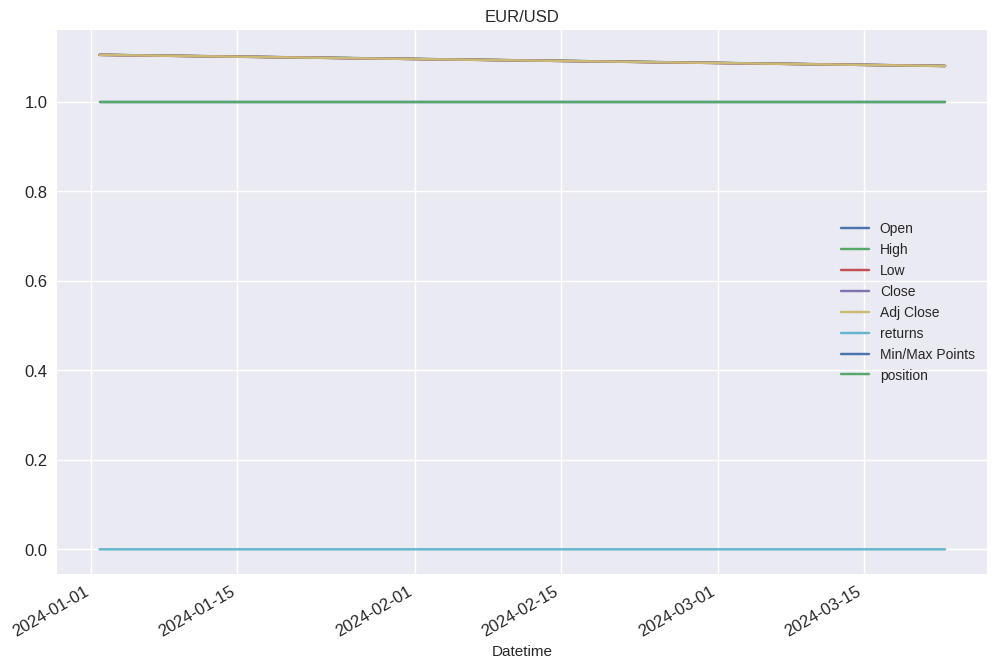

In [9]:
df.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [10]:
df["returns"] = np.log(df.div(df.shift(1)))

ValueError: Columns must be same length as key

In [ ]:
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


## A simple Buy and Hold "Strategy"

In [ ]:
df.dropna(inplace = True)

In [ ]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


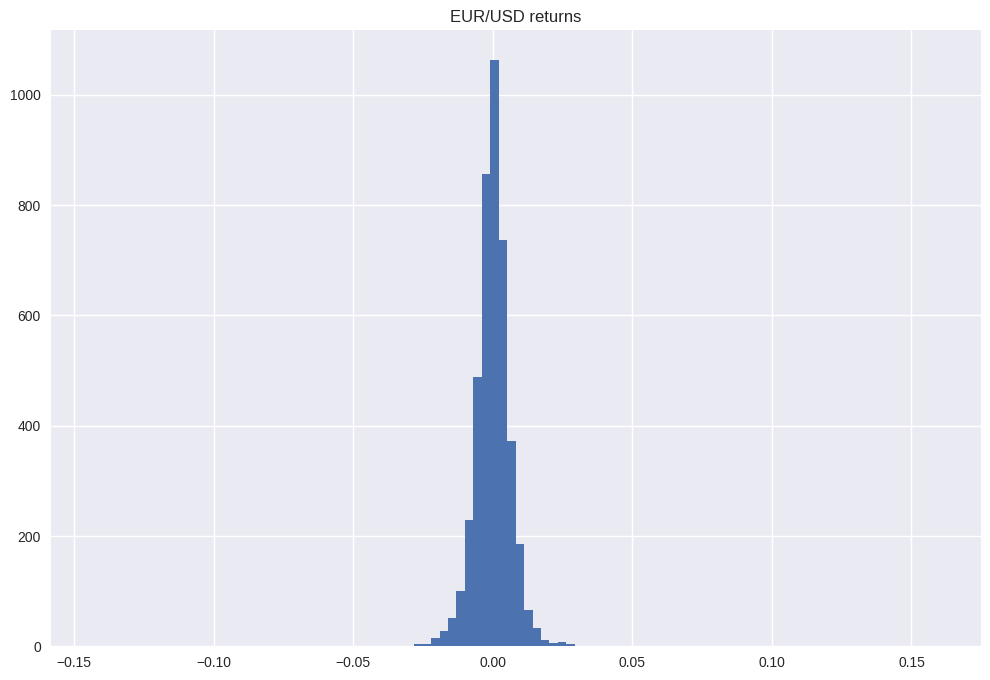

In [ ]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("EUR/USD returns")
plt.show()

In [ ]:
df.returns.sum()

-0.11214302770699758

In [ ]:
np.exp(df.returns.sum())

0.8939163935445148

In [ ]:
df.price[-1] / df.price[0]

0.8939163935445141

In [ ]:
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [ ]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [ ]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


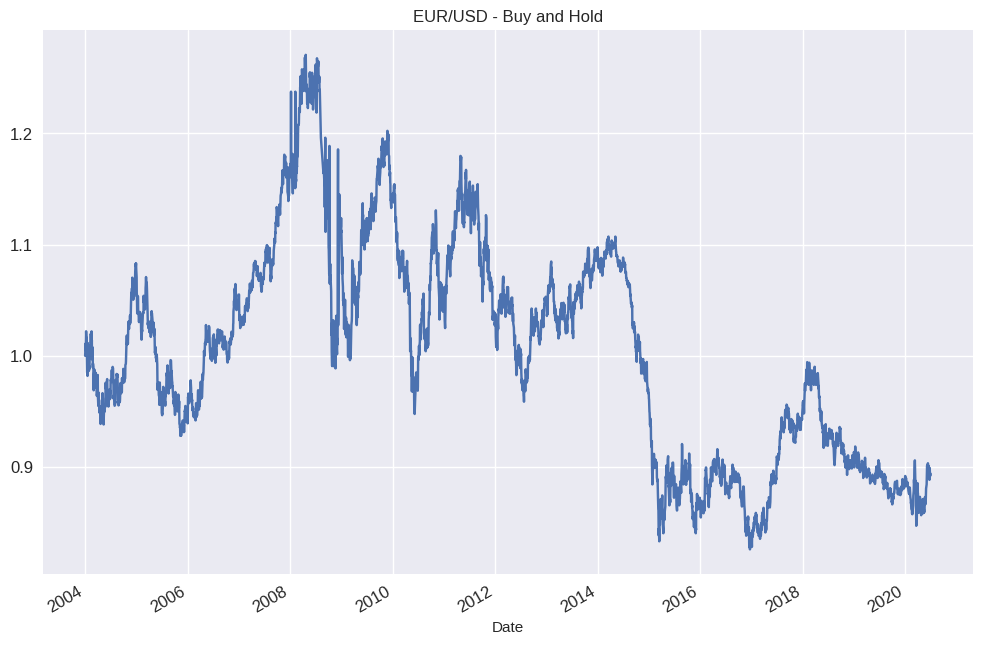

In [ ]:
df.creturns.plot(figsize = (12, 8), title = "EUR/USD - Buy and Hold", fontsize = 12)
plt.show()

## More Performance Metrics

In [ ]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [ ]:
df.creturns.iloc[-1] # absolute Performance 

0.8939163935445149

In [ ]:
df.returns.sum() # absolute Performance

-0.11214302770699758

In [ ]:
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


__annualized mean return and risk__

In [ ]:
df.returns.mean() * 252 # mean return

-0.006612083056191715

In [ ]:
df.returns.std() * np.sqrt(252) # risk

0.12054120479431406

__maximum drawdown__

In [ ]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [ ]:
df["cummax"] = df.creturns.cummax()

In [ ]:
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


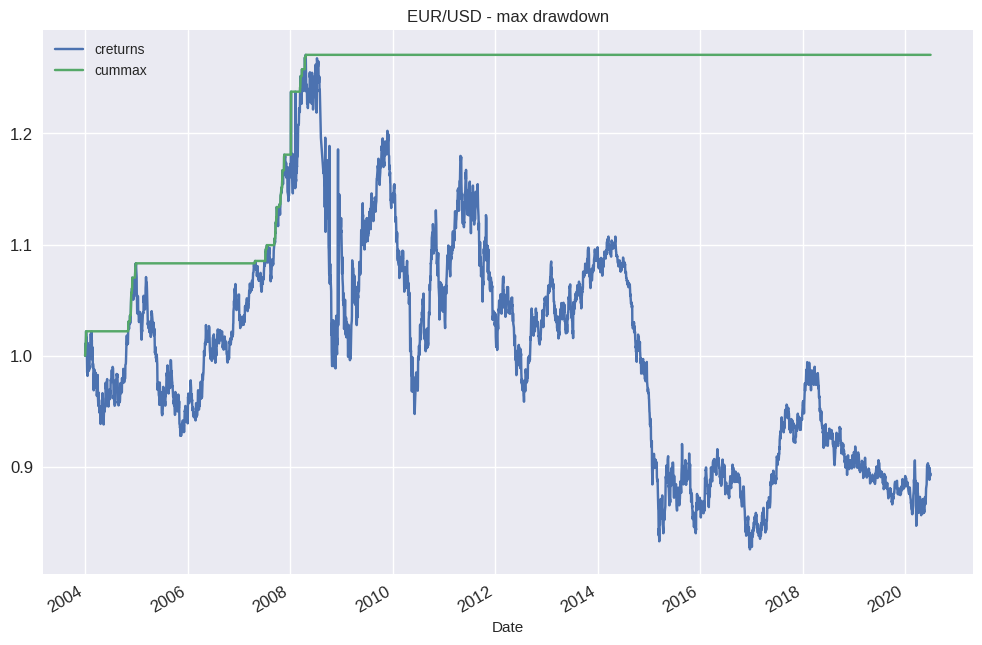

In [ ]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [ ]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [ ]:
drawdown.max() # maximum drawdown

0.4448840569933439

In [ ]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

## Defining an SMA Crossover Strategy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/tmp/ipykernel_12155/1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [ ]:
sma_s = 50
sma_l = 200

In [ ]:
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

In [ ]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [ ]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [ ]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


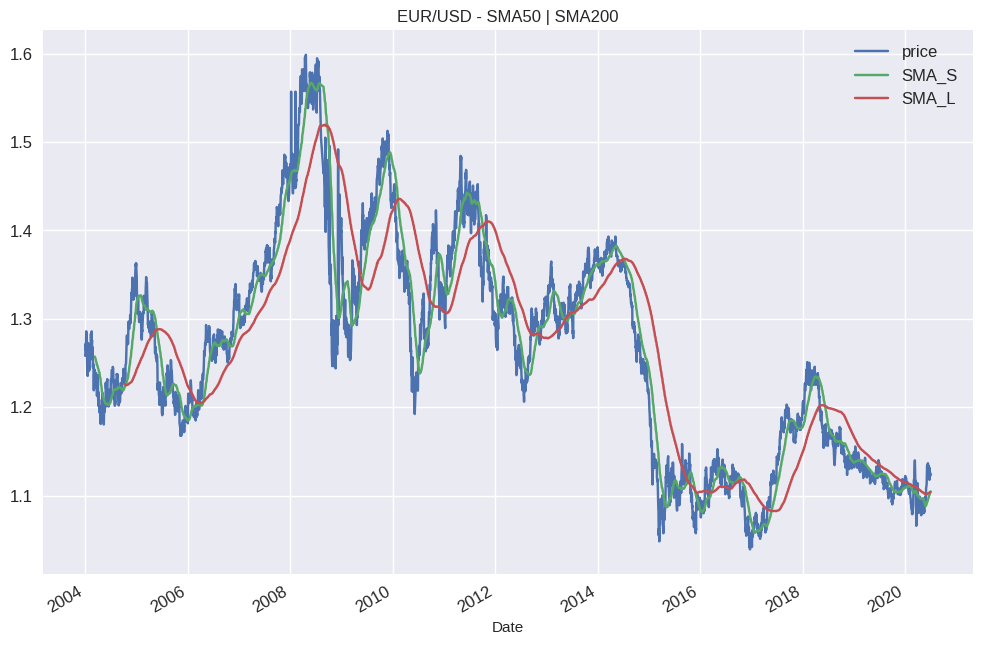

In [ ]:
data.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


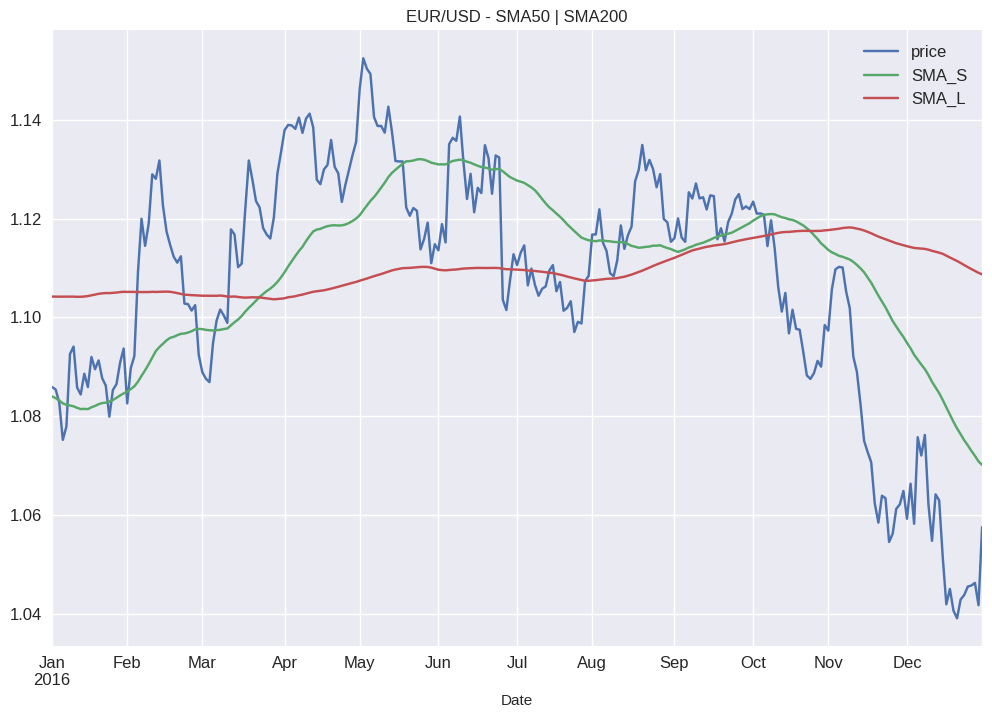

In [ ]:
data.loc["2016"].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
data

,price,SMA_S,SMA_L,position,Min/Max Points
Date,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1.0,-1.0
2004-10-07,1.229906,1.221840,1.226081,NaN,NaN
2004-10-08,1.241003,1.222628,1.225995,NaN,NaN
2004-10-11,1.238405,1.223352,1.225843,NaN,NaN
2004-10-12,1.232104,1.223888,1.225643,NaN,NaN
...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,NaN,NaN
2020-06-25,1.125087,1.102486,1.103540,NaN,NaN
2020-06-26,1.122208,1.103213,1.103627,NaN,NaN


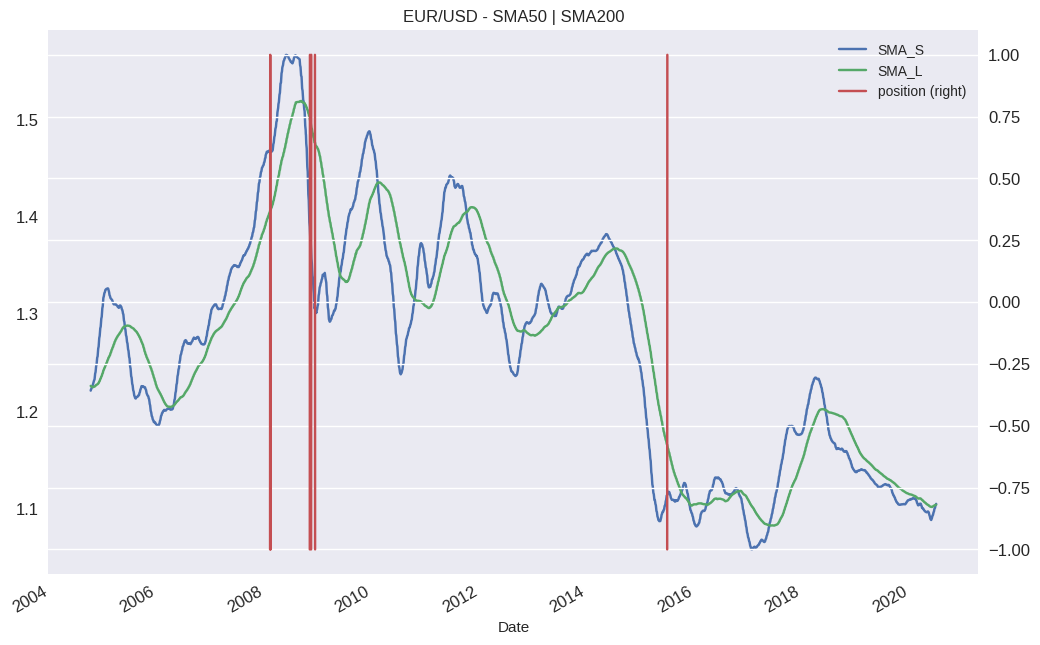

In [ ]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

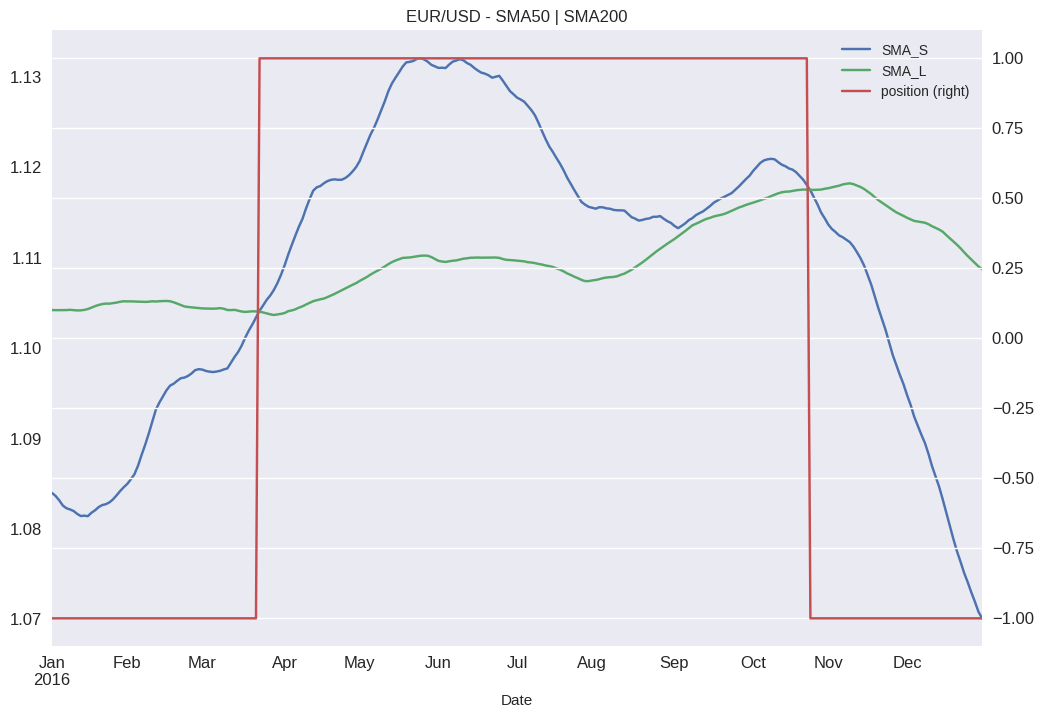

In [ ]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

## Vectorized Strategy Backtesting

In [ ]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


In [ ]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [ ]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [ ]:
data.dropna(inplace = True)

In [ ]:
data[["returns", "strategy"]].sum() # absolute performance

returns    -0.087929
strategy    0.249591
dtype: float64

In [ ]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     0.915826
strategy    1.283500
dtype: float64

In [ ]:
data[["returns", "strategy"]].mean() * 252 # annualized return

returns    -0.005438
strategy    0.015435
dtype: float64

In [ ]:
data[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.120806
strategy    0.120802
dtype: float64

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001476,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010511,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008396,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003265,0.996746
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.921130,1.271272
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.916125,1.278218
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.913781,1.281497


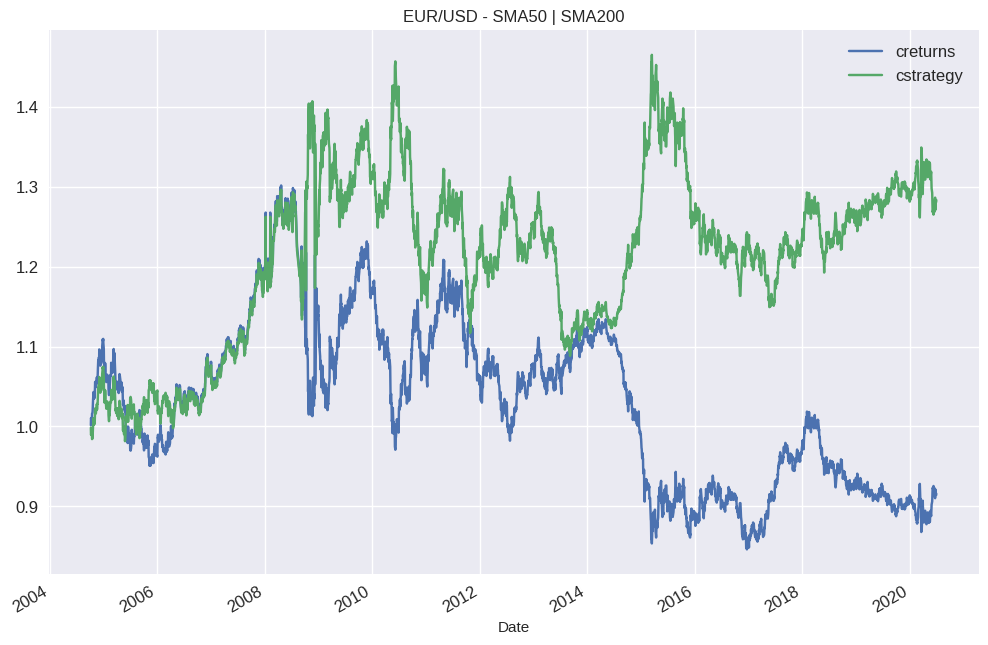

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

0.3676743925451291

## Finding the optimal SMA Strategy

In [ ]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [ ]:
def test_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return np.exp(data["strategy"].sum())

In [ ]:
test_strategy((50, 200))

1.2835003323288487

In [ ]:
test_strategy((75, 150))

1.58974017632631

In [ ]:
test_strategy((25, 252))

1.1755957408242586

In [ ]:
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [ ]:
SMA_S_range

range(10, 50)

In [ ]:
from itertools import product

In [ ]:
list(product(SMA_S_range, SMA_L_range))

[(10, 100),
 (10, 101),
 (10, 102),
 (10, 103),
 (10, 104),
 (10, 105),
 (10, 106),
 (10, 107),
 (10, 108),
 (10, 109),
 (10, 110),
 (10, 111),
 (10, 112),
 (10, 113),
 (10, 114),
 (10, 115),
 (10, 116),
 (10, 117),
 (10, 118),
 (10, 119),
 (10, 120),
 (10, 121),
 (10, 122),
 (10, 123),
 (10, 124),
 (10, 125),
 (10, 126),
 (10, 127),
 (10, 128),
 (10, 129),
 (10, 130),
 (10, 131),
 (10, 132),
 (10, 133),
 (10, 134),
 (10, 135),
 (10, 136),
 (10, 137),
 (10, 138),
 (10, 139),
 (10, 140),
 (10, 141),
 (10, 142),
 (10, 143),
 (10, 144),
 (10, 145),
 (10, 146),
 (10, 147),
 (10, 148),
 (10, 149),
 (10, 150),
 (10, 151),
 (10, 152),
 (10, 153),
 (10, 154),
 (10, 155),
 (10, 156),
 (10, 157),
 (10, 158),
 (10, 159),
 (10, 160),
 (10, 161),
 (10, 162),
 (10, 163),
 (10, 164),
 (10, 165),
 (10, 166),
 (10, 167),
 (10, 168),
 (10, 169),
 (10, 170),
 (10, 171),
 (10, 172),
 (10, 173),
 (10, 174),
 (10, 175),
 (10, 176),
 (10, 177),
 (10, 178),
 (10, 179),
 (10, 180),
 (10, 181),
 (10, 182),
 (10

In [ ]:
combinations = list(product(SMA_S_range, SMA_L_range))

In [ ]:
len(combinations)

6080

In [ ]:
(50-10) * (252-100)

6080

In [ ]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))

KeyboardInterrupt: 

In [ ]:
results

In [ ]:
np.max(results)

In [ ]:
np.argmax(results)

In [ ]:
combinations[np.argmax(results)]

In [ ]:
many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
many_results

In [ ]:
many_results["performance"] = results

In [ ]:
many_results

In [ ]:
many_results.nlargest(10, "performance")

In [ ]:
many_results.nsmallest(10, "performance")